In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras._tf_keras.keras.preprocessing import image

In [3]:
img_height, img_width = 28, 28
batch_size = 32

df = pd.read_csv('pics_labels.csv')

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory='Dataset/',
    x_col="filename",
    y_col="label",
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory='Dataset/',
    x_col="filename",
    y_col="label",
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

num_classes = len(train_generator.class_indices)
print(f"Number of classes (letters): {num_classes}")

Found 7867 validated image filenames belonging to 63 classes.
Found 1966 validated image filenames belonging to 63 classes.
Number of classes (letters): 63


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 12 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 12 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [4]:

model = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax'),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 63)             │         8,127 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,871 (905.75 KB)

 Trainable params: 231,871 (905.75 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 171s 694ms/step - accuracy: 0.0930 - loss: 3.6701 - val_accuracy: 0.0392 - val_loss: 10.4654
Epoch 2/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.3861 - loss: 1.8551 - val_accuracy: 0.0448 - val_loss: 12.7988
Epoch 3/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5139 - loss: 1.3260 - val_accuracy: 0.0448 - val_loss: 15.7798
Epoch 4/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6189 - loss: 1.0403 - val_accuracy: 0.0448 - val_loss: 18.2463
Epoch 5/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6709 - loss: 0.8745 - val_accuracy: 0.0448 - val_loss: 20.6640
Epoch 6/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7228 - loss: 0.7554 - val_accuracy: 0.0448 - val_loss: 19.8580
Epoch 7/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7520 - loss: 0.6761 - val_accuracy: 0.0443 - val_loss: 22.0900
Epoch 8/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7796 - loss: 0.5992 

In [6]:
model.save('letter_recognizer_model.h5')

In [19]:

img_path = 'test letter.png'
img = image.load_img(img_path, target_size=(img_height, img_width), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)
labels = list(train_generator.class_indices.keys())
predicted_letter = labels[predicted_class_index]

print(f"Predicted Letter: {predicted_letter}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Letter: p


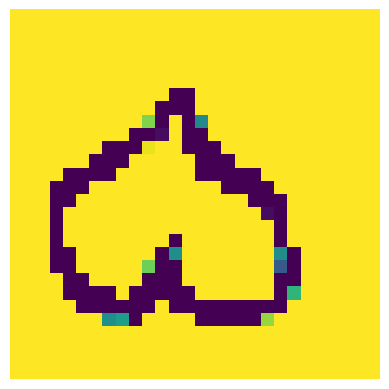

In [20]:
plt.imshow(img)
plt.axis('off')
plt.show()